# TP3 - Multivariate random variable generation and Gaussian random processes
Eliott Van Dieren - epfl

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.special import erf
import math
import scipy.integrate as integrate
import scipy.special as special
import time
from random import randint

## 1. Multivariate random variable generation

In [2]:
mu = np.array([2,1])
Sigma = np.array([1,2,2,5]).reshape(2,2)

In [3]:
L = np.linalg.cholesky(Sigma)
print(L)
print("Verif : ", np.sum(L@L.T == Sigma) == len(Sigma)**2)

[[1. 0.]
 [2. 1.]]
Verif :  True


In [4]:
N = 10**6
nCol = 2
X = np.zeros((N,nCol))

In [5]:
for n in range(N):
    Y = np.random.randn(2)
    X[n] = mu + L@Y

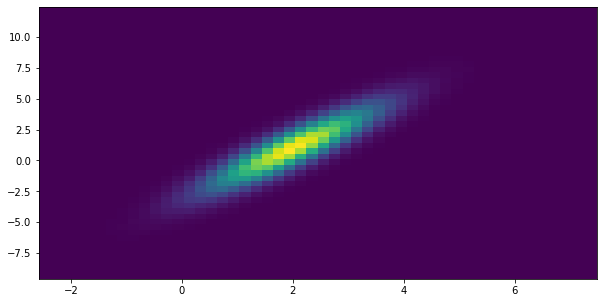

In [6]:
fig, ax = plt.subplots(1,figsize=(10,5))
ax.hist2d(X[:,0],X[:,1],bins=50) 
#H = np.histogram2d(X[:,0],X[:,1],bins=50)[0]
#H = H.T
#plt.imshow(H, interpolation='nearest', origin='lower')
#ax.plot(axis[0],axis[1])
plt.show()

# as X^T(Sigma^-1)X is quadratic, when we observe the contour of it, it gives us an elliptical form (as seen below)
# and the principal axis are the eigenvectors of Sigma^-1
#np.linalg.eig(np.linalg.inv(Sigma))

X0 mean:  2.000993886800888
X1 mean:  1.0031860632029923


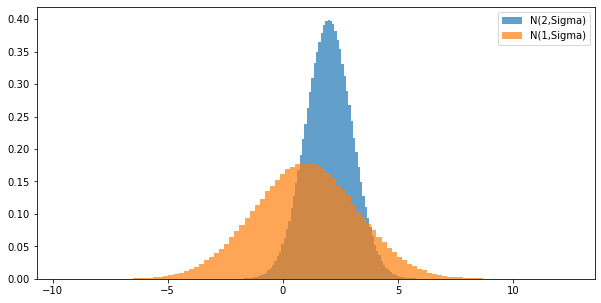

In [7]:
fig, ax = plt.subplots(1,figsize=(10,5))
ax.hist(X[:,0],label="N(2,Sigma)",density="True",bins=100,alpha=0.7)
print("X0 mean: ",X[:,0].mean())
print("X1 mean: ",X[:,1].mean())
ax.hist(X[:,1],label="N(1,Sigma)",density="True",bins=100,alpha=0.7)
plt.legend()
plt.show()

In [8]:
X2 = np.zeros((N,nCol))
Sigma2 = np.array([1,2,2,4]).reshape(2,2) # Singular Matrix with eigenvalues 0 and 5
eig_vals, V = np.linalg.eig(Sigma2) # s.t. Sigma2 = VDV.T where D = np.diag(eig_vals)

In [9]:
D_sqrt = np.array(list(map(lambda x : np.sqrt(x), np.diag(eig_vals))))
L2 = V@D_sqrt

In [10]:
for n in range(N):
    Y = np.random.randn(2)
    X2[n] = mu + L2@Y

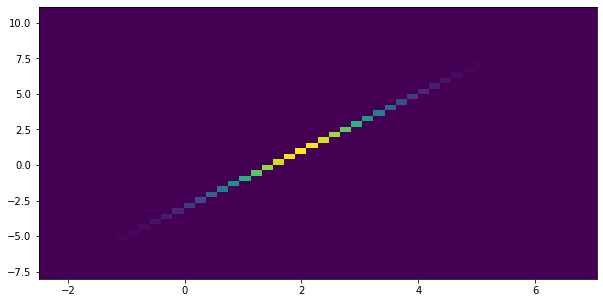

In [11]:
fig, ax = plt.subplots(1,figsize=(10,5))
ax.hist2d(X2[:,0],X2[:,1],bins=50) 
plt.show()

X0 mean:  1.9999085467640865
X1 mean:  0.9998170935281733


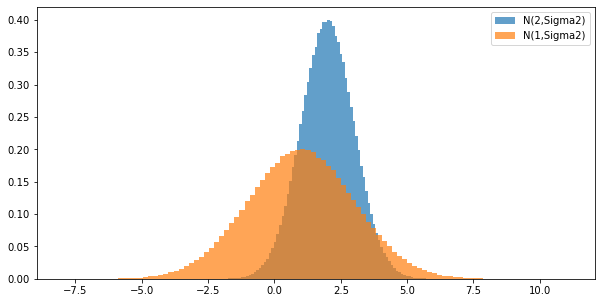

In [12]:
fig, ax = plt.subplots(1,figsize=(10,5))
ax.hist(X2[:,0],label="N(2,Sigma2)",density="True",bins=100,alpha=0.7)
print("X0 mean: ",X2[:,0].mean())
print("X1 mean: ",X2[:,1].mean())
ax.hist(X2[:,1],label="N(1,Sigma2)",density="True",bins=100,alpha=0.7)
plt.legend()
plt.show()

In [13]:
np.cov(X2.T) # verif :)

array([[1.00020077, 2.00040154],
       [2.00040154, 4.00080309]])

## 2. Gaussian Processes

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
(51, 51)


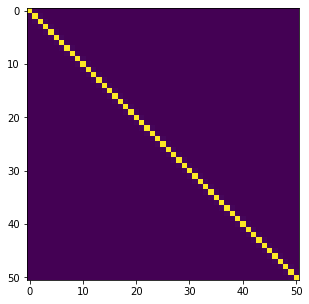

In [14]:
n = 51
rho = 1/200
I = [0,1]
time_Z = np.linspace(I[0],I[1],n)
print(time_Z)
mu_Z = np.sin(2*np.pi*time_Z)
cov_matrix_Z = np.zeros((n,n))
for idx_t,t in enumerate(time_Z):
    for idx_s,s in enumerate(time_Z):
        cov_matrix_Z[idx_t][idx_s] = np.exp(-np.abs(t-s)/rho)

L_Z = np.linalg.cholesky(cov_matrix_Z)
print(L_Z.shape)
Y = np.random.randn(n)
Z_obs = mu_Z + L_Z@Y
        
fig, ax = plt.subplots(1,figsize=(10, 5))
plt.imshow(cov_matrix_Z)
plt.show()

In [15]:
m = n-1
time_Y = np.array([(2*j+1)/(2*(n-1)) for j in range(m)])
print(time_Y)
N = m+n
cov_matrix_Y = np.zeros((m,m))
cov_matrix_Z = np.zeros((n,n))
cov_matrix_YZ = np.zeros((m,n))

[0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19 0.21 0.23 0.25 0.27
 0.29 0.31 0.33 0.35 0.37 0.39 0.41 0.43 0.45 0.47 0.49 0.51 0.53 0.55
 0.57 0.59 0.61 0.63 0.65 0.67 0.69 0.71 0.73 0.75 0.77 0.79 0.81 0.83
 0.85 0.87 0.89 0.91 0.93 0.95 0.97 0.99]


In [16]:
mu_X = np.concatenate([np.sin(2*np.pi*time_Y),np.sin(2*np.pi*time_Z)])
for idx_t,t in enumerate(time_Y):
    for idx_s,s in enumerate(time_Y):
        cov_matrix_Y[idx_t][idx_s] = np.exp(-np.abs(t-s)/rho)
for idx_t,t in enumerate(time_Z):
    for idx_s,s in enumerate(time_Z):
        cov_matrix_Z[idx_t][idx_s] = np.exp(-np.abs(t-s)/rho)
for idx_t,t in enumerate(time_Y):
    for idx_s,s in enumerate(time_Z):
        cov_matrix_YZ[idx_t][idx_s] = np.exp(-np.abs(t-s)/rho)
block_1 = np.concatenate((cov_matrix_Y, cov_matrix_YZ), axis=1)
block_2 = np.concatenate((cov_matrix_YZ.T, cov_matrix_Z),axis=1)
print(block_1.shape)
print(block_2.shape)
cov_matrix_X = np.concatenate((block_1,block_2),axis=0)
cov_matrix_X.shape

(50, 101)
(51, 101)


(101, 101)

In [17]:
L_X = np.linalg.cholesky(cov_matrix_X)
L_X.shape
Y = np.random.randn(n+m)
X_gen = mu_X + L_X@Y

In [18]:
#plt.figure(figsize=(10,5))
#plt.plot(X_gen)
#plt.show()

In [19]:
Y_cond_Z = X_gen[:m] + cov_matrix_YZ@np.linalg.inv(cov_matrix_Z)@(Z_obs-X_gen[m:])

In [20]:
Y_cond_Z

array([ 0.21016379,  0.12199748, -0.36332235,  0.35447659,  0.90419191,
        3.12911652,  1.93176662,  2.25580369,  0.48283895,  1.79103481,
        0.21298152,  1.21635124,  1.39518095,  1.44032072,  2.72082285,
        0.79977359,  1.79725095,  0.65107159, -0.96577582,  0.89221469,
        0.4364254 ,  0.96159497, -0.51838072,  0.73212288,  0.26731334,
        0.62567128,  0.61742879, -1.82188684, -1.02978048,  0.26280937,
       -0.3956196 , -1.26933922, -0.62135151, -1.05566136, -1.68698032,
       -0.68956434, -0.12011892, -0.19054686, -1.61136116, -0.95995064,
        0.12919212,  1.93883464, -1.78352455, -1.28735791, -0.67503089,
        0.31220976,  0.0592763 , -0.00776793,  0.43633101, -1.04474702])

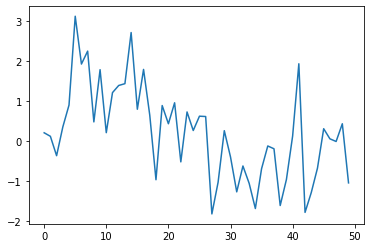

In [21]:
plt.plot(Y_cond_Z)